## Questions I aim to ask in this project:

* Can we predict the number of streams a song will get (on Spotify) based on its audio features (danceability, energy, loudness, etc.) and metadata (artist, album type)?

* What factors contribute to a higher number of views, likes, and comments on the YouTube videos of these songs and can we predict them?

* Is there a correlation between the number of streams on Spotify and the number of views/likes on YouTube for the same song?

### 

__Tools I intend to use:__

Linear Regression, Random Forest, Neural Networks, Decision Trees, SVM, k-NN, Adaboost.

## About the Spotify - Youtube Dataset

Dataset of songs of various artist in the world and for each song is present:

* Several statistics of the music version on spotify, including the number of streams;
* Number of views of the official music video of the song on youtube.

### Content
It includes 26 variables for each of the songs collected from spotify. These variables are briefly described next:

* __Track__: name of the song, as visible on the Spotify platform.

* __Artist__: name of the artist.

* __Url_spotify__: the Url of the artist.

* __Album__: the album in wich the song is contained on Spotify.

* __Album_type__: indicates if the song is relesead on Spotify as a single or contained in an album.

* __Uri__: a spotify link used to find the song through the API.

* __Danceability__: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* __Energy__: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* __Key__: the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* __Loudness__: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

* __Speechiness__: detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* __Acousticness__: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* __Instrumentalness__: predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* __Liveness__: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* __Valence__: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* __Tempo__: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* __Duration_ms__: the duration of the track in milliseconds.

* __Stream__: number of streams of the song on Spotify.

* __Url_youtube__: url of the video linked to the song on Youtube, if it have any.

* __Title__: title of the videoclip on youtube.

* __Channel__: name of the channel that have published the video.

* __Views__: number of views.

* __Likes__: number of likes.

* __Comments__: number of comments.

* __Description__: description of the video on Youtube.

* __Licensed__: Indicates whether the video represents licensed content, which means that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner.

* __official_video__: boolean value that indicates if the video found is the official video of the song.

In [728]:
import pandas as pd

# Load the dataset
file_path = 'Spotify_Youtube.csv'
data = pd.read_csv(file_path)

# Drop unnecessary columns 
data = data.drop(['Unnamed: 0', "Url_spotify", "Uri", "Url_youtube", "Licensed", "official_video"], axis=1)

# Drop duplicates and missing values
data = data.drop_duplicates().dropna()

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Display the full numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Display the dataset
data

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.000,-6.679,0.177,0.008,0.002,0.613,0.772,138.559,222640.000,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.000,6220896.000,169907.000,Official HD Video for Gorillaz' fantastic trac...,1040234854.000
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.000,-5.815,0.030,0.087,0.001,0.046,0.852,92.761,200173.000,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.000,1079128.000,31003.000,The official video for Gorillaz - Rhinestone E...,310083733.000
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.000,-3.930,0.052,0.043,0.047,0.116,0.551,108.014,215150.000,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.000,282142.000,7399.000,Gorillaz - New Gold ft. Tame Impala & Bootie B...,63063467.000
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.000,-5.810,0.026,0.000,0.509,0.064,0.578,120.423,233867.000,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.000,1788577.000,55229.000,Follow Gorillaz online:\nhttp://gorillaz.com \...,434663559.000
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.000,-8.627,0.171,0.025,0.000,0.070,0.525,167.953,340920.000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.000,6197318.000,155930.000,The official music video for Gorillaz - Clint ...,617259738.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,5.000,-6.344,0.033,0.448,0.000,0.084,0.658,90.002,94667.000,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.000,1113.000,0.000,Provided to YouTube by Routenote\n\nJUST DANCE...,9227144.000
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.000,-1.786,0.137,0.028,0.000,0.092,0.657,174.869,150857.000,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.000,2019.000,0.000,Provided to YouTube by Routenote\n\nSET FIRE T...,10898176.000
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.000,-4.679,0.065,0.024,0.000,0.154,0.419,168.388,136842.000,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.000,329.000,0.000,Provided to YouTube by Routenote\n\nOUTSIDE HA...,6226110.000
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.000,-4.004,0.419,0.356,0.018,0.108,0.539,155.378,108387.000,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.000,88.000,0.000,Provided to YouTube by Routenote\n\nONLY GIRL ...,6873961.000


In [729]:
data.isna().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Stream              0
dtype: int64

In [730]:
data.info()
data.columns


<class 'pandas.core.frame.DataFrame'>
Index: 19170 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19170 non-null  object 
 1   Track             19170 non-null  object 
 2   Album             19170 non-null  object 
 3   Album_type        19170 non-null  object 
 4   Danceability      19170 non-null  float64
 5   Energy            19170 non-null  float64
 6   Key               19170 non-null  float64
 7   Loudness          19170 non-null  float64
 8   Speechiness       19170 non-null  float64
 9   Acousticness      19170 non-null  float64
 10  Instrumentalness  19170 non-null  float64
 11  Liveness          19170 non-null  float64
 12  Valence           19170 non-null  float64
 13  Tempo             19170 non-null  float64
 14  Duration_ms       19170 non-null  float64
 15  Title             19170 non-null  object 
 16  Channel           19170 non-null  object 
 17

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Description', 'Stream'],
      dtype='object')

In [731]:
data.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000,19170.000
mean,0.621,0.636,5.293,-7.615,0.095,0.288,0.055,0.191,0.528,120.607,224761.202,97197683.382,682353.145,28386.558,138274645.540
std,0.166,0.213,3.580,4.618,0.105,0.286,0.193,0.165,0.245,29.588,127846.796,279999663.313,1820550.190,197797.860,247730902.135
min,0.000,0.000,0.000,-46.251,0.000,0.000,0.000,0.015,0.000,0.000,30985.000,26.000,0.000,0.000,6574.000
25%,0.520,0.510,2.000,-8.745,0.036,0.044,0.000,0.094,0.338,96.998,180267.000,2070213.000,24473.500,583.000,17869370.250
50%,0.639,0.667,5.000,-6.504,0.051,0.188,0.000,0.125,0.535,119.969,213321.000,15689592.000,133277.000,3515.500,50379376.500
75%,0.742,0.798,8.000,-4.918,0.104,0.469,0.000,0.234,0.724,139.946,251963.000,73690397.750,542346.250,14941.000,140757852.500
max,0.975,1.000,11.000,0.920,0.964,0.996,1.000,1.000,0.993,243.372,4676058.000,8079649362.000,50788652.000,16083138.000,3386520288.000


In [732]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Artist', 'Track', 'Album', 'Album_type', 'Title', 'Channel', 'Description']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


data

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Stream
0,675,4597,2487,0,0.818,0.705,6.000,-6.679,0.177,0.008,0.002,0.613,0.772,138.559,222640.000,5818,1833,693555221.000,6220896.000,169907.000,8297,1040234854.000
1,675,11457,7313,0,0.676,0.703,8.000,-5.815,0.030,0.087,0.001,0.046,0.852,92.761,200173.000,5822,1833,72011645.000,1079128.000,31003.000,13690,310083733.000
2,675,9554,6553,2,0.695,0.923,1.000,-3.930,0.052,0.043,0.047,0.116,0.551,108.014,215150.000,5819,1833,8435055.000,282142.000,7399.000,4721,63063467.000
3,675,10082,7313,0,0.689,0.739,2.000,-5.810,0.026,0.000,0.509,0.064,0.578,120.423,233867.000,5821,1833,211754952.000,1788577.000,55229.000,4236,434663559.000
4,675,2674,3913,0,0.663,0.694,10.000,-8.627,0.171,0.025,0.000,0.070,0.525,167.953,340920.000,5814,1833,618480958.000,6197318.000,155930.000,13544,617259738.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,1589,6868,4798,2,0.582,0.926,5.000,-6.344,0.033,0.448,0.000,0.084,0.658,90.002,94667.000,6778,4168,71678.000,1113.000,0.000,10223,9227144.000
20714,1589,11713,8005,2,0.531,0.936,4.000,-1.786,0.137,0.028,0.000,0.092,0.657,174.869,150857.000,13100,4168,164741.000,2019.000,0.000,10231,10898176.000
20715,1589,9969,6795,2,0.443,0.830,4.000,-4.679,0.065,0.024,0.000,0.154,0.419,168.388,136842.000,11359,4168,35646.000,329.000,0.000,10227,6226110.000
20716,1589,9959,6785,2,0.417,0.767,9.000,-4.004,0.419,0.356,0.018,0.108,0.539,155.378,108387.000,11353,4168,6533.000,88.000,0.000,10226,6873961.000


In [733]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19170 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19170 non-null  int64  
 1   Track             19170 non-null  int64  
 2   Album             19170 non-null  int64  
 3   Album_type        19170 non-null  int64  
 4   Danceability      19170 non-null  float64
 5   Energy            19170 non-null  float64
 6   Key               19170 non-null  float64
 7   Loudness          19170 non-null  float64
 8   Speechiness       19170 non-null  float64
 9   Acousticness      19170 non-null  float64
 10  Instrumentalness  19170 non-null  float64
 11  Liveness          19170 non-null  float64
 12  Valence           19170 non-null  float64
 13  Tempo             19170 non-null  float64
 14  Duration_ms       19170 non-null  float64
 15  Title             19170 non-null  int64  
 16  Channel           19170 non-null  int64  
 17

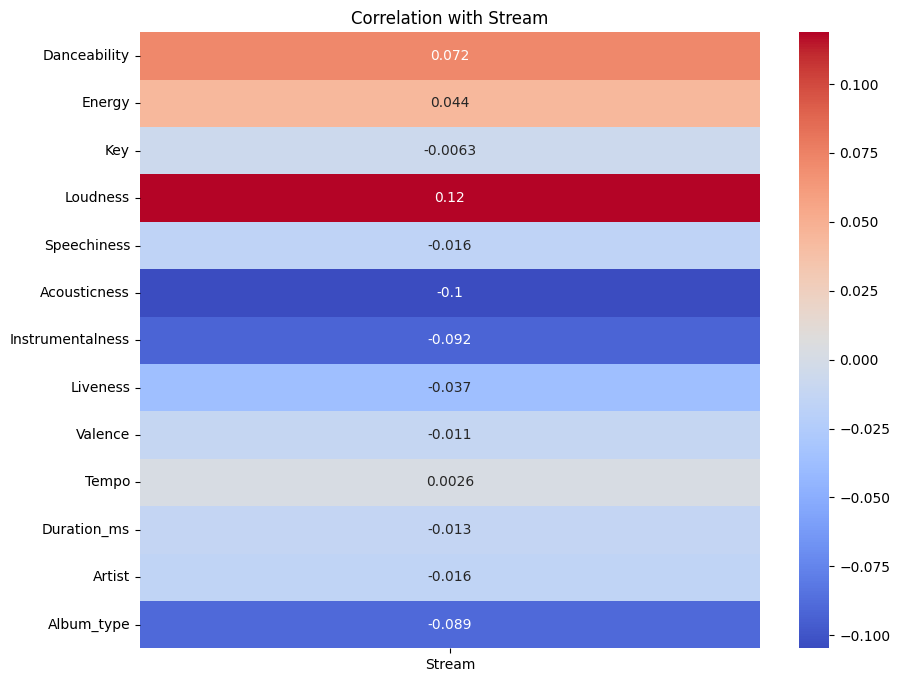

In [734]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis for 'Spotify' (Stream)

# Select the relevant columns
features_streams = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Artist', 'Album_type']
target_streams = 'Stream'

# Calculate the correlation matrix
corr_matrix_streams = data[features_streams + [target_streams]].corr()

# Extract the correlation values for the target variable 'Stream'
corr_streams = corr_matrix_streams[[target_streams]].drop(target_streams)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_streams, annot=True, cmap='coolwarm')
plt.title('Correlation with Stream')
plt.show()

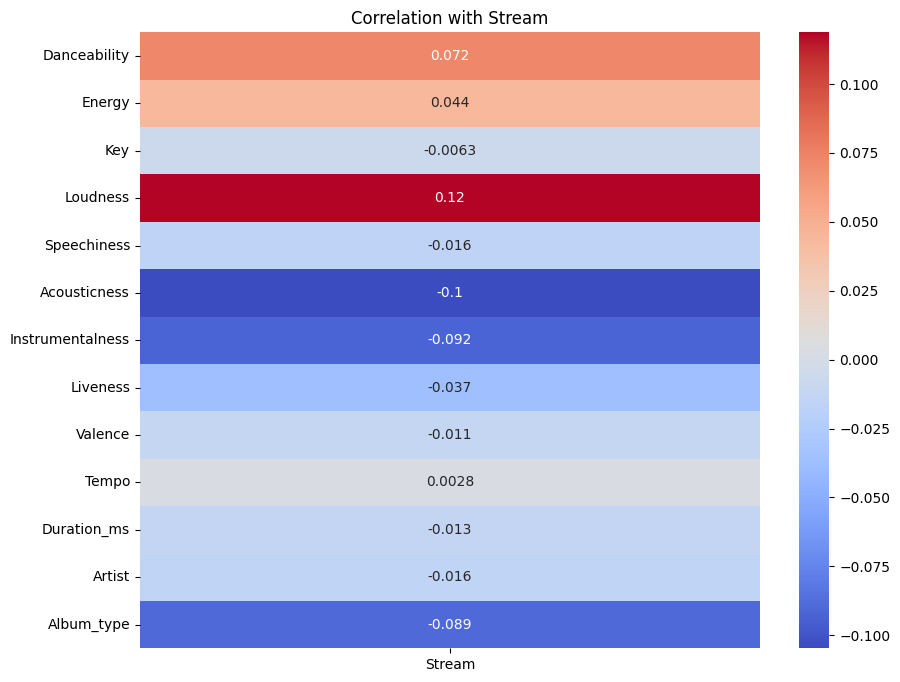

In [735]:
# Replace zero values in 'Tempo' column with the median
median_tempo = data['Tempo'][data['Tempo'] > 0].median()
data['Tempo'] = data['Tempo'].replace(0, median_tempo)

# Correlation Analysis for 'Spotify' (Stream)

# Select the relevant columns
features_streams = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Artist', 'Album_type']
target_streams = 'Stream'

# Calculate the correlation matrix
corr_matrix_streams = data[features_streams + [target_streams]].corr()

# Extract the correlation values for the target variable 'Stream'
corr_streams = corr_matrix_streams[[target_streams]].drop(target_streams)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_streams, annot=True, cmap='coolwarm')
plt.title('Correlation with Stream')
plt.show()


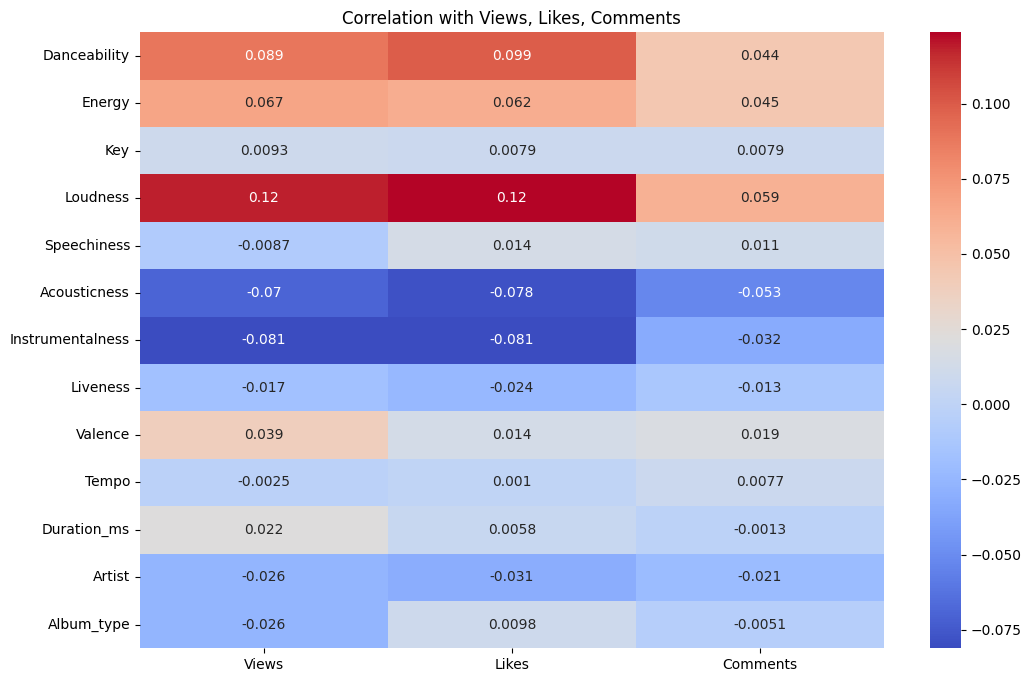

In [736]:
# Correlation Analysis for Youtube ('Views', 'Likes', 'Comments')

# Select the relevant columns
features_youtube = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Artist', 'Album_type']
target_youtube = ['Views', 'Likes', 'Comments']

# Calculate the correlation matrix
corr_matrix_youtube = data[features_youtube + target_youtube].corr()

# Extract the correlation values for the target variables
corr_youtube = corr_matrix_youtube[target_youtube].drop(target_youtube, axis=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_youtube, annot=True, cmap='coolwarm')
plt.title('Correlation with Views, Likes, Comments')
plt.show()

In [737]:
selected_columns = data[['Danceability', 'Energy', 'Loudness', 'Tempo']]
selected_columns

,Danceability,Energy,Loudness,Tempo
0,0.818,0.705,-6.679,138.559
1,0.676,0.703,-5.815,92.761
2,0.695,0.923,-3.930,108.014
3,0.689,0.739,-5.810,120.423
4,0.663,0.694,-8.627,167.953
...,...,...,...,...
20713,0.582,0.926,-6.344,90.002
20714,0.531,0.936,-1.786,174.869
20715,0.443,0.830,-4.679,168.388
20716,0.417,0.767,-4.004,155.378


In [738]:
# Get minimum values in each column
min_values = selected_columns.min()
print("\nMinimum values in each column:\n", min_values)

# Get maximum values in each column
max_values = selected_columns.max()
print("\nMaximum values in each column:\n", max_values)


Minimum values in each column:
 Danceability     0.000
Energy           0.000
Loudness       -46.251
Tempo           37.114
dtype: float64

Maximum values in each column:
 Danceability     0.975
Energy           1.000
Loudness         0.920
Tempo          243.372
dtype: float64


In [739]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

df = pd.DataFrame(data)

# Categorize Danceability
# quantiles = df['Danceability'].quantile([0, 0.25, 0.5, 0.75, 1]).values
# df["Dance_class"] = pd.cut(df['Danceability'], bins=quantiles, labels=[1, 2, 3, 4], include_lowest=True)

# Categorize Energy
# quantiles = df['Energy'].quantile([0, 0.25, 0.5, 0.75, 1]).values
# df["Energy_class"] = pd.cut(df['Energy'], bins=quantiles, labels=[1, 2, 3, 4], include_lowest=True)

# Categorize Loudness
# quantiles = df['Loudness'].quantile([0, 0.25, 0.5, 0.75, 1]).values
# df["Loud_class"] = pd.cut(df['Loudness'], bins=quantiles, labels=[1, 2, 3, 4], include_lowest=True)

# Categorize Tempo
# quantiles = df['Tempo'].quantile([0, 0.25, 0.5, 0.75, 1]).values
# df["Tempo_class"] = pd.cut(df['Tempo'], bins=quantiles, labels=[1, 2, 3, 4], include_lowest=True)



## Target encoding using mean of target variable within each bin

# df['Dance_class'] = df.groupby(pd.cut(df['Danceability'], bins=4))['Stream'].transform('mean')
# df['Dance_class'] = pd.cut(df['Dance_class'], bins=4, labels=[1, 2, 3, 4], include_lowest=True)

# df['Energy_class'] = df.groupby(pd.cut(df['Energy'], bins=4))['Stream'].transform('mean')
# df['Energy_class'] = pd.cut(df['Energy_class'], bins=4, labels=[1, 2, 3, 4], include_lowest=True)

# df['Loud_class'] = df.groupby(pd.cut(df['Loudness'], bins=4))['Stream'].transform('mean')
# df['Loud_class'] = pd.cut(df['Loud_class'], bins=4, labels=[1, 2, 3, 4], include_lowest=True)

# df['Tempo_class'] = df.groupby(pd.cut(df['Tempo'], bins=4))['Stream'].transform('mean')
# df['Tempo_class'] = pd.cut(df['Tempo_class'], bins=4, labels=[1, 2, 3, 4], include_lowest=True)



# # Mean encoding with regularization
global_mean = df['Stream'].mean()
n = df.groupby('Danceability')['Stream'].transform('count')
mean_target = df.groupby('Danceability')['Stream'].transform('mean')
df['Dance_class'] = (mean_target * n + global_mean * 10) / (n + 10)
df['Dance_class'] = pd.cut(df['Dance_class'], bins=4, labels=[1, 2, 3, 4], include_lowest=True)

global_mean = df['Stream'].mean()
n = df.groupby('Energy')['Stream'].transform('count')
mean_target = df.groupby('Energy')['Stream'].transform('mean')
df['Energy_class'] = (mean_target * n + global_mean * 10) / (n + 10)
df['Energy_class'] = pd.cut(df['Energy_class'], bins=4, labels=[1, 2, 3, 4], include_lowest=True)

global_mean = df['Stream'].mean()
n = df.groupby('Loudness')['Stream'].transform('count')
mean_target = df.groupby('Loudness')['Stream'].transform('mean')
df['Loud_class'] = (mean_target * n + global_mean * 10) / (n + 10)
df['Loud_class'] = pd.cut(df['Loud_class'], bins=4, labels=[1, 2, 3, 4], include_lowest=True)

# global_mean = df['Stream'].mean()
# n = df.groupby('Tempo')['Stream'].transform('count')
# mean_target = df.groupby('Tempo')['Stream'].transform('mean')
# df['Tempo_class'] = (mean_target * n + global_mean * 10) / (n + 10)
# df['Tempo_class'] = pd.cut(df['Tempo_class'], bins=4, labels=[1, 2, 3, 4], include_lowest=True)

# Adding noise
df['Tempo_class'] = df.groupby('Tempo')['Stream'].transform('mean')
df['Tempo_class'] += np.random.normal(0, 0.01, df['Tempo_class'].shape)
df['Tempo_class'] = pd.cut(df['Tempo_class'], bins=4, labels=[1, 2, 3, 4], include_lowest=True)



# df[['Tempo_class', 'Stream']].corr()
# df['Dance_class'].value_counts()

df

# df

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Stream,Dance_class,Energy_class,Loud_class,Tempo_class
0,675,4597,2487,0,0.818,0.705,6.000,-6.679,0.177,0.008,0.002,0.613,0.772,138.559,222640.000,5818,1833,693555221.000,6220896.000,169907.000,8297,1040234854.000,2,2,2,2
1,675,11457,7313,0,0.676,0.703,8.000,-5.815,0.030,0.087,0.001,0.046,0.852,92.761,200173.000,5822,1833,72011645.000,1079128.000,31003.000,13690,310083733.000,1,2,1,1
2,675,9554,6553,2,0.695,0.923,1.000,-3.930,0.052,0.043,0.047,0.116,0.551,108.014,215150.000,5819,1833,8435055.000,282142.000,7399.000,4721,63063467.000,2,1,1,1
3,675,10082,7313,0,0.689,0.739,2.000,-5.810,0.026,0.000,0.509,0.064,0.578,120.423,233867.000,5821,1833,211754952.000,1788577.000,55229.000,4236,434663559.000,3,2,1,1
4,675,2674,3913,0,0.663,0.694,10.000,-8.627,0.171,0.025,0.000,0.070,0.525,167.953,340920.000,5814,1833,618480958.000,6197318.000,155930.000,13544,617259738.000,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,1589,6868,4798,2,0.582,0.926,5.000,-6.344,0.033,0.448,0.000,0.084,0.658,90.002,94667.000,6778,4168,71678.000,1113.000,0.000,10223,9227144.000,1,1,1,1
20714,1589,11713,8005,2,0.531,0.936,4.000,-1.786,0.137,0.028,0.000,0.092,0.657,174.869,150857.000,13100,4168,164741.000,2019.000,0.000,10231,10898176.000,1,1,1,1
20715,1589,9969,6795,2,0.443,0.830,4.000,-4.679,0.065,0.024,0.000,0.154,0.419,168.388,136842.000,11359,4168,35646.000,329.000,0.000,10227,6226110.000,2,1,1,1
20716,1589,9959,6785,2,0.417,0.767,9.000,-4.004,0.419,0.356,0.018,0.108,0.539,155.378,108387.000,11353,4168,6533.000,88.000,0.000,10226,6873961.000,2,2,1,1


In [740]:
df['Energy_class'].value_counts()


Energy_class
1    12796
2     5898
3      456
4       20
Name: count, dtype: int64

In [741]:
df['Loud_class'].value_counts()


Loud_class
1    17226
2     1724
3      200
4       20
Name: count, dtype: int64

In [742]:
df['Tempo_class'].value_counts()


Tempo_class
1    18809
2      323
3       35
4        3
Name: count, dtype: int64

In [743]:
selected_columns = df[['Dance_class', 'Energy_class', 'Loud_class', 'Tempo_class']]
selected_columns

,Dance_class,Energy_class,Loud_class,Tempo_class
0,2,2,2,2
1,1,2,1,1
2,2,1,1,1
3,3,2,1,1
4,2,2,1,1
...,...,...,...,...
20713,1,1,1,1
20714,1,1,1,1
20715,2,1,1,1
20716,2,2,1,1


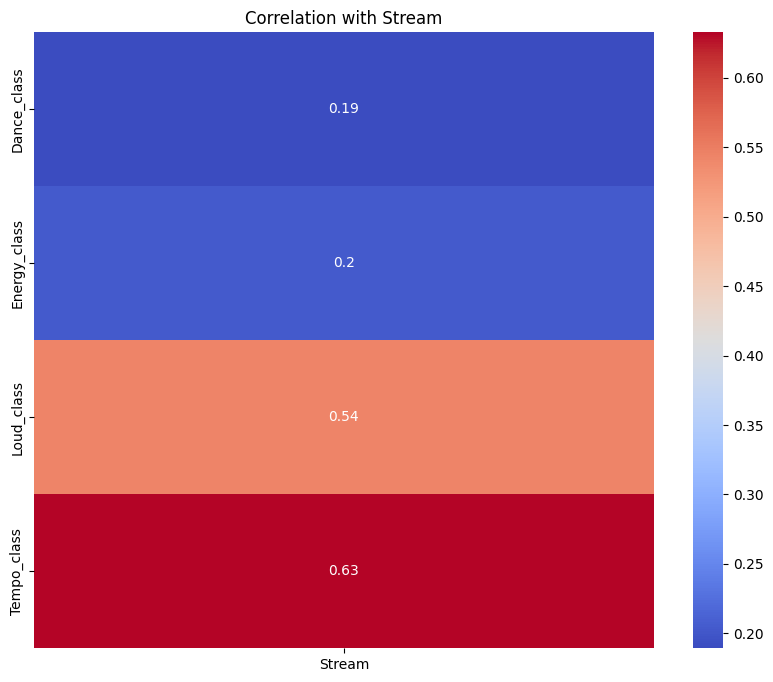

In [744]:
# Correlation Analysis for 'Spotify' (Stream)

# Select the relevant columns
features_streams = ['Dance_class', 'Energy_class', 'Loud_class', 'Tempo_class']
target_streams = 'Stream'

# Calculate the correlation matrix
corr_matrix_streams = df[features_streams + [target_streams]].corr()

# Extract the correlation values for the target variable 'Stream'
corr_streams = corr_matrix_streams[[target_streams]].drop(target_streams)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_streams, annot=True, cmap='coolwarm')
plt.title('Correlation with Stream')
plt.show()

In [745]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis for 'Spotify' (Stream)

# Select the relevant columns
features_streams = ['Danceability', 'Energy', 'Key', 'Loudness'
                    , 'Speechiness', 'Acousticness', 'Instrumentalness',
                    'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Artist', 'Album_type',
                    'Dance_class', 'Energy_class', 'Loud_class', 'Tempo_class']
target_streams = 'Stream'

# Calculate the correlation matrix
corr_matrix_streams = df[features_streams + [target_streams]].corr()

# Extract the correlation values for the target variable 'Stream'
corr_streams = corr_matrix_streams[[target_streams]].drop(target_streams)

# Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_streams, annot=True, cmap='coolwarm')
# plt.title('Correlation with Stream')
# plt.show()

corr_streams

,Stream
Danceability,0.072
Energy,0.044
Key,-0.006
Loudness,0.119
Speechiness,-0.016
Acousticness,-0.105
Instrumentalness,-0.092
Liveness,-0.037
Valence,-0.011
Tempo,0.003


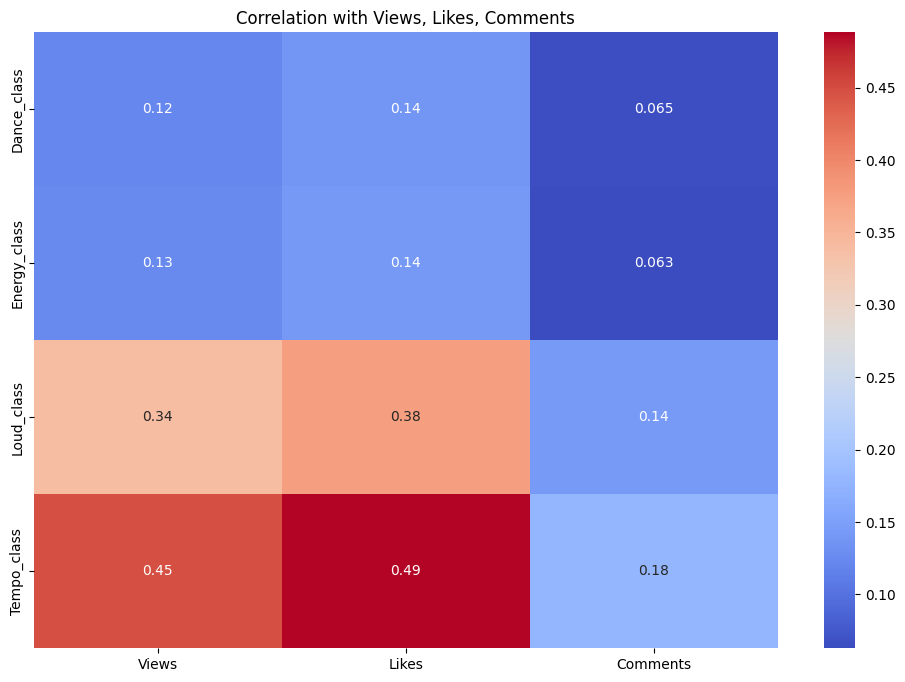

In [746]:
# Correlation Analysis for Youtube ('Views', 'Likes', 'Comments')

# Select the relevant columns
features_youtube = ['Dance_class', 'Energy_class', 'Loud_class', 'Tempo_class']
target_youtube = ['Views', 'Likes', 'Comments']

# Calculate the correlation matrix
corr_matrix_youtube = df[features_youtube + target_youtube].corr()

# Extract the correlation values for the target variables
corr_youtube = corr_matrix_youtube[target_youtube].drop(target_youtube, axis=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_youtube, annot=True, cmap='coolwarm')
plt.title('Correlation with Views, Likes, Comments')
plt.show()

In [749]:
from sklearn.preprocessing import MinMaxScaler

# # Normalize the features
# scaler = MinMaxScaler()
# df[['Views_norm', 'Likes_norm', 'Comments_norm']] = scaler.fit_transform(df[['Views', 'Likes', 'Comments']])

# # Create the YouTube_popularity column
# df['YouTube_popularity'] = df[['Views_norm', 'Likes_norm', 'Comments_norm']].sum(axis=1)

# # Drop the intermediate normalized columns if not needed
# df.drop(columns=['Views_norm', 'Likes_norm', 'Comments_norm'], inplace=True)

# Create the YouTube_popularity column
df['Youtube_popularity'] = df['Views'] + df['Likes'] * 0.2 + df['Comments'] * 0.1

scaler = MinMaxScaler()
df['YouTube_popularity'] = scaler.fit_transform(df[['YouTube_popularity']])

df

KeyError: "None of [Index(['YouTube_popularity'], dtype='object')] are in the [columns]"

In [ ]:
selected_columns = df[['Stream']]

# Get minimum values in each column
min_values = selected_columns.min()
print("\nMinimum values in Stream column:\n", min_values)

# Get maximum values in each column
max_values = selected_columns.max()
print("\nMaximum values in Stream column:\n", max_values)


Minimum values in Stream column:
 Stream   6574.000
dtype: float64

Maximum values in Stream column:
 Stream   3386520288.000
dtype: float64


In [ ]:
selected_columns = df[['YouTube_popularity']]

# Get minimum values in each column
min_values = selected_columns.min()
print("\nMinimum values in YouTube_popularity column:\n", min_values)

# Get maximum values in each column
max_values = selected_columns.max()
print("\nMaximum values in YouTube_popularity column:\n", max_values)


Minimum values in YouTube_popularity column:
 YouTube_popularity   0.000
dtype: float64

Maximum values in YouTube_popularity column:
 YouTube_popularity   2.264
dtype: float64


In [ ]:
# Categorize popularity

quantiles = df['Stream'].quantile([0, 0.33, 0.66, 1]).values
df["Spotify_popularity_class"] = pd.cut(df['Stream'], bins=quantiles, labels=[1, 2, 3], include_lowest=True)

quantiles = df['YouTube_popularity'].quantile([0, 0.33, 0.66, 1]).values
df["YouTube_popularity_class"] = pd.cut(df['YouTube_popularity'], bins=quantiles, labels=[1, 2, 3], include_lowest=True)

df

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Stream,Dance_class,Energy_class,Loud_class,Tempo_class,YouTube_popularity,Spotify_popularity_class,YouTube_popularity_class
0,675,4597,2487,0,0.818,0.705,6.000,-6.679,0.177,0.008,0.002,0.613,0.772,138.559,222640.000,5818,1833,693555221.000,6220896.000,169907.000,8297,1040234854.000,2,2,2,2,0.219,3,3
1,675,11457,7313,0,0.676,0.703,8.000,-5.815,0.030,0.087,0.001,0.046,0.852,92.761,200173.000,5822,1833,72011645.000,1079128.000,31003.000,13690,310083733.000,1,2,1,1,0.032,3,3
2,675,9554,6553,2,0.695,0.923,1.000,-3.930,0.052,0.043,0.047,0.116,0.551,108.014,215150.000,5819,1833,8435055.000,282142.000,7399.000,4721,63063467.000,2,1,1,1,0.007,2,2
3,675,10082,7313,0,0.689,0.739,2.000,-5.810,0.026,0.000,0.509,0.064,0.578,120.423,233867.000,5821,1833,211754952.000,1788577.000,55229.000,4236,434663559.000,3,2,1,1,0.065,3,3
4,675,2674,3913,0,0.663,0.694,10.000,-8.627,0.171,0.025,0.000,0.070,0.525,167.953,340920.000,5814,1833,618480958.000,6197318.000,155930.000,13544,617259738.000,2,2,1,1,0.208,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,1589,6868,4798,2,0.582,0.926,5.000,-6.344,0.033,0.448,0.000,0.084,0.658,90.002,94667.000,6778,4168,71678.000,1113.000,0.000,10223,9227144.000,1,1,1,1,0.000,1,1
20714,1589,11713,8005,2,0.531,0.936,4.000,-1.786,0.137,0.028,0.000,0.092,0.657,174.869,150857.000,13100,4168,164741.000,2019.000,0.000,10231,10898176.000,1,1,1,1,0.000,1,1
20715,1589,9969,6795,2,0.443,0.830,4.000,-4.679,0.065,0.024,0.000,0.154,0.419,168.388,136842.000,11359,4168,35646.000,329.000,0.000,10227,6226110.000,2,1,1,1,0.000,1,1
20716,1589,9959,6785,2,0.417,0.767,9.000,-4.004,0.419,0.356,0.018,0.108,0.539,155.378,108387.000,11353,4168,6533.000,88.000,0.000,10226,6873961.000,2,2,1,1,0.000,1,1


In [ ]:
df['Spotify_popularity_class'].value_counts()


Spotify_popularity_class
3    6518
1    6326
2    6326
Name: count, dtype: int64

In [ ]:
df['YouTube_popularity_class'].value_counts()


YouTube_popularity_class
3    6518
1    6326
2    6326
Name: count, dtype: int64

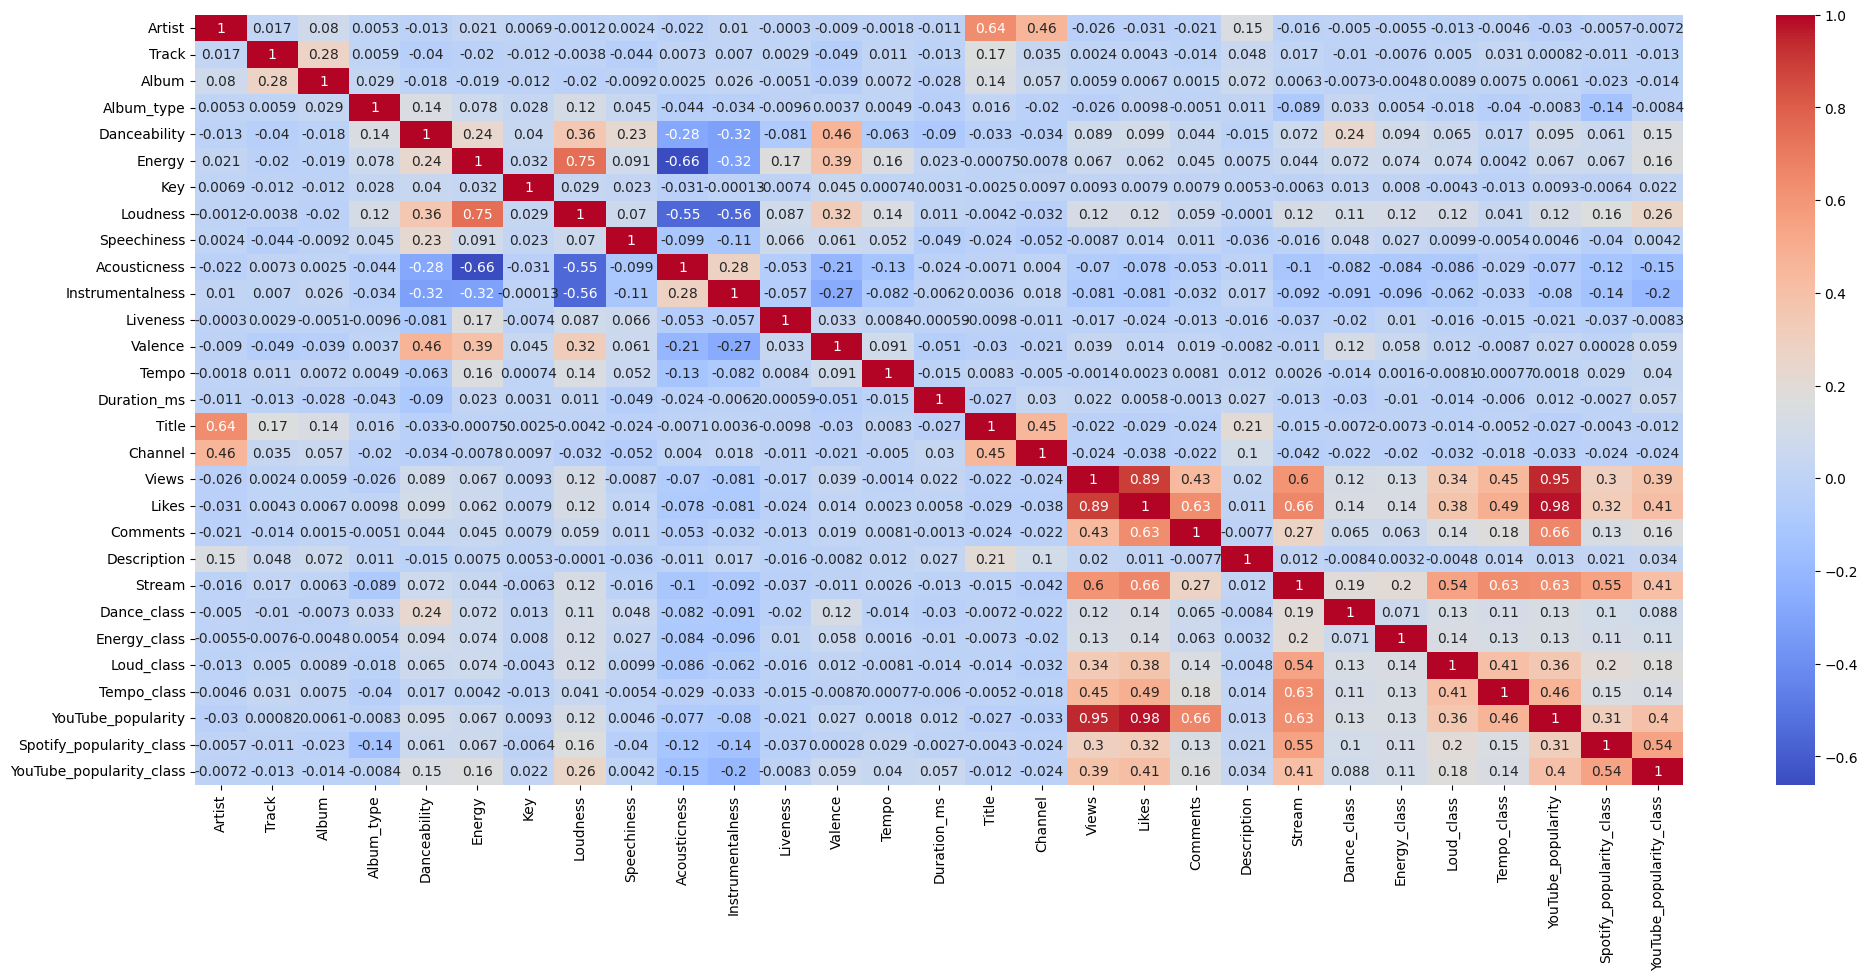

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(24, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


### View the top 20 songs on Spotify:

In [ ]:
sorted_df = df.sort_values(by='Spotify_popularity_class', ascending=False)

# Select the top 20 rows
top_20_songs = sorted_df.head(20)

top_20_songs

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Stream,Dance_class,Energy_class,Loud_class,Tempo_class,YouTube_popularity,Spotify_popularity_class,YouTube_popularity_class
0,675,4597,2487,0,0.818,0.705,6.000,-6.679,0.177,0.008,0.002,0.613,0.772,138.559,222640.000,5818,1833,693555221.000,6220896.000,169907.000,8297,1040234854.000,2,2,2,2,0.219,4,4
9679,407,10343,4925,0,0.803,0.565,5.000,-4.711,0.235,0.056,0.000,0.141,0.474,163.085,200221.000,3559,1077,291378174.000,4069377.000,150920.000,379,600816184.000,1,1,2,1,0.126,4,4
9693,1236,14143,8631,0,0.949,0.683,9.000,-4.242,0.095,0.020,0.000,0.171,0.887,130.012,184635.000,10187,3155,57253168.000,1175835.000,52710.000,13701,252117867.000,3,1,1,1,0.034,4,4
9691,1236,1887,3893,0,0.914,0.732,8.000,-6.100,0.241,0.017,0.000,0.107,0.469,94.066,171067.000,10182,3155,143983689.000,2094500.000,73286.000,13702,276552095.000,1,2,1,1,0.064,4,4
9689,1236,11717,8015,2,0.800,0.837,6.000,-2.807,0.049,0.004,0.003,0.090,0.702,100.015,225600.000,3575,1078,189936873.000,4965979.000,339120.000,11664,200709786.000,3,1,1,1,0.142,4,4
9688,1236,13179,9960,0,0.814,0.626,7.000,-7.187,0.214,0.173,0.000,0.101,0.686,123.972,201334.000,10181,3155,62623814.000,1055742.000,37110.000,13700,251154370.000,2,1,1,1,0.031,4,4
9687,1236,15090,10443,2,0.935,0.454,1.000,-7.509,0.375,0.019,0.000,0.082,0.357,133.073,187541.000,2674,791,491081173.000,8780413.000,598076.000,2482,1139623127.000,3,2,3,2,0.271,4,4
9686,1236,1562,4794,0,0.713,0.676,10.000,-5.483,0.027,0.038,0.000,0.154,0.721,99.048,227395.000,9946,3082,146805833.000,1486916.000,35659.000,16206,562537258.000,2,1,1,1,0.050,4,4
9685,407,719,10348,0,0.545,0.781,10.000,-3.616,0.185,0.014,0.000,0.161,0.277,150.097,232507.000,3547,2421,118147093.000,736298.000,39883.000,2975,298554019.000,2,2,1,1,0.032,4,4
9683,407,6446,10547,0,0.413,0.807,11.000,-3.499,0.318,0.054,0.000,0.631,0.438,149.330,296147.000,3552,1077,201243386.000,973320.000,65167.000,7147,200860448.000,2,1,1,1,0.048,4,4


### View the top 20 songs on YouTube:

In [ ]:
sorted_df = df.sort_values(by='YouTube_popularity_class', ascending=False)

# Select the top 20 rows
top_20_songs = sorted_df.head(20)

top_20_songs

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Stream,Dance_class,Energy_class,Loud_class,Tempo_class,YouTube_popularity,Spotify_popularity_class,YouTube_popularity_class
0,675,4597,2487,0,0.818,0.705,6.000,-6.679,0.177,0.008,0.002,0.613,0.772,138.559,222640.000,5818,1833,693555221.000,6220896.000,169907.000,8297,1040234854.000,2,2,2,2,0.219,4,4
16349,629,15553,10683,0,0.748,0.713,6.000,-6.399,0.355,0.005,0.000,0.245,0.482,75.591,279573.000,10935,2892,169441164.000,1499310.000,51635.000,6505,165386493.000,3,2,1,1,0.054,4,4
16296,638,10536,7241,0,0.708,0.945,5.000,-3.247,0.234,0.001,0.080,0.227,0.545,127.960,203133.000,5541,1736,136375831.000,734262.000,23306.000,13543,280951537.000,2,1,1,1,0.033,4,4
6813,1137,3194,2352,0,0.739,0.341,10.000,-9.971,0.038,0.525,0.000,0.072,0.231,80.958,266000.000,9395,2882,125010564.000,708493.000,35880.000,6473,59755582.000,2,1,2,1,0.032,3,4
16308,569,6907,4835,2,0.474,0.921,9.000,-10.431,0.046,0.005,0.850,0.476,0.696,93.010,122339.000,4385,1367,41643830.000,985283.000,19349.000,7999,397464720.000,1,1,1,1,0.026,4,4
16318,2036,11155,7043,0,0.732,0.573,11.000,-5.733,0.024,0.560,0.000,0.054,0.882,97.502,152923.000,16609,5293,150072255.000,939528.000,29748.000,3888,98582948.000,2,2,1,1,0.039,3,4
16319,2036,3550,421,0,0.839,0.667,11.000,-3.961,0.031,0.322,0.000,0.244,0.878,124.889,171360.000,3086,901,607883484.000,4522521.000,132626.000,3614,198065883.000,2,1,1,1,0.173,4,4
16320,2036,14476,7474,0,0.634,0.440,2.000,-4.266,0.028,0.322,0.000,0.311,0.590,126.052,238023.000,42,3727,233284390.000,1366897.000,9605.000,14323,62021525.000,1,1,1,1,0.056,3,4
16322,2036,7454,7474,0,0.808,0.253,7.000,-7.267,0.033,0.847,0.000,0.229,0.274,122.879,490753.000,1068,320,208749849.000,1722961.000,63317.000,9827,54658192.000,2,1,1,1,0.064,3,4
16326,2036,4176,6073,0,0.592,0.743,2.000,-4.103,0.029,0.429,0.000,0.096,0.763,127.926,205236.000,17057,320,71686653.000,751064.000,22095.000,16070,40313397.000,2,1,1,1,0.025,2,4


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif


features = ['Dance_class' , 'Energy_class', 'Loud_class', 'Tempo_class']
# features = ['Danceability', 'Energy', 'Loudness', 'Tempo']
target_spotify = 'Spotify_popularity_class'
target_youtube = 'YouTube_popularity_class'

# X_spotify = df[features]
X_spotify = df.drop(columns=['Spotify_popularity_class', 'YouTube_popularity_class', 'Stream', 'YouTube_popularity', 'Views', 'Likes', 'Comments'])
y_spotify = df[target_spotify]

# Select the top 10 features
selector = SelectKBest(f_classif, k=10)
X_spotify = selector.fit_transform(X_spotify, y_spotify)

X_youtube = df[features]
y_youtube = df[target_youtube]

# Split the data
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(X_spotify, y_spotify, test_size=0.3, random_state=42)
X_train_youtube, X_test_youtube, y_train_youtube, y_test_youtube = train_test_split(X_youtube, y_youtube, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_spotify_scaled = scaler.fit_transform(X_train_spotify)
X_test_spotify_scaled = scaler.transform(X_test_spotify)

X_train_youtube_scaled = scaler.fit_transform(X_train_youtube)
X_test_youtube_scaled = scaler.transform(X_test_youtube)


[[ 0.     0.818 -6.679 ...  2.     2.     2.   ]
 [ 0.     0.676 -5.815 ...  2.     1.     1.   ]
 [ 2.     0.695 -3.93  ...  1.     1.     1.   ]
 ...
 [ 2.     0.443 -4.679 ...  1.     1.     1.   ]
 [ 2.     0.417 -4.004 ...  2.     1.     1.   ]
 [ 2.     0.498 -4.543 ...  1.     1.     1.   ]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, f1_score

# Define additional models
additional_models = {
    'AdaBoost': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier()
}

# Combine all models including the previous ones
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial' , solver='lbfgs', max_iter=100), # LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=10),
    'SVM': SVC(kernel='poly', degree=3, C=1),
    'AdaBoost': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
    
}

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    if name in ['Random Forest', 'AdaBoost', 'KNN', 'Decision Tree']:
        model.fit(X_train_spotify, y_train_spotify)
        y_pred_spotify = model.predict(X_test_spotify)
        model.fit(X_train_youtube, y_train_youtube)
        y_pred_youtube = model.predict(X_test_youtube)
    else:
        model.fit(X_train_spotify_scaled, y_train_spotify)
        y_pred_spotify = model.predict(X_test_spotify_scaled)
        model.fit(X_train_youtube_scaled, y_train_youtube)
        y_pred_youtube = model.predict(X_test_youtube_scaled)

    print(f"Evaluating {name} on Spotify data")
    print("-" * 50)
    print(f"{name} Accuracy on Spotify:", accuracy_score(y_test_spotify, y_pred_spotify))
    print(f"{name} F1 Score on Spotify:", f1_score(y_test_spotify, y_pred_spotify, average='weighted'))
    print("Confusion Matrix on Spotify:\n", confusion_matrix(y_test_spotify, y_pred_spotify))
    print("-" * 50)
    
    print(f"Evaluating {name} on YouTube data")
    print("-" * 50)
    print(f"{name} Accuracy on YouTube:", accuracy_score(y_test_youtube, y_pred_youtube))
    print(f"{name} F1 Score on YouTube:", f1_score(y_test_youtube, y_pred_youtube, average='weighted'))
    print("Confusion Matrix on YouTube:\n", confusion_matrix(y_test_youtube, y_pred_youtube))
    print("-" * 50)

Evaluating Logistic Regression on Spotify data
--------------------------------------------------
Logistic Regression Accuracy on Spotify: 0.3590679881759694
Logistic Regression F1 Score on Spotify: 0.3527014562130223
Confusion Matrix on Spotify:
 [[707 254 268 278]
 [422 324 368 295]
 [354 327 385 385]
 [223 177 335 649]]
--------------------------------------------------
Evaluating Logistic Regression on YouTube data
--------------------------------------------------
Logistic Regression Accuracy on YouTube: 0.2982090071291949
Logistic Regression F1 Score on YouTube: 0.2559643831686052
Confusion Matrix on YouTube:
 [[869 155 106 321]
 [797 127 113 355]
 [791 160 112 401]
 [607 132  98 607]]
--------------------------------------------------
Evaluating Random Forest on Spotify data
--------------------------------------------------
Random Forest Accuracy on Spotify: 0.3919318379412276
Random Forest F1 Score on Spotify: 0.39235871773626546
Confusion Matrix on Spotify:
 [[640 381 271 215

/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluating AdaBoost on Spotify data
--------------------------------------------------
AdaBoost Accuracy on Spotify: 0.3554164493131629
AdaBoost F1 Score on Spotify: 0.35072249548573725
Confusion Matrix on Spotify:
 [[625 313 276 293]
 [379 361 367 302]
 [326 367 372 386]
 [201 213 284 686]]
--------------------------------------------------
Evaluating AdaBoost on YouTube data
--------------------------------------------------
AdaBoost Accuracy on YouTube: 0.2952529994783516
AdaBoost F1 Score on YouTube: 0.2775710134357937
Confusion Matrix on YouTube:
 [[445 591 106 309]
 [412 541 113 326]
 [367 599 113 385]
 [271 476  98 599]]
--------------------------------------------------
Evaluating KNN on Spotify data
--------------------------------------------------
KNN Accuracy on Spotify: 0.33037732568249
KNN F1 Score on Spotify: 0.3300352830418893
Confusion Matrix on Spotify:
 [[610 407 286 204]
 [430 452 307 220]
 [393 430 373 255]
 [276 337 306 465]]
--------------------------------------

In [ ]:

# Train and evaluate models for both Spotify and YouTube
for name, model in models.items():
    # Spotify
    print(f"Evaluating {name} on Spotify data")
    if name == 'Random Forest':
        model.fit(X_train_spotify, y_train_spotify)  # No need to scale for Random Forest
        y_pred_spotify = model.predict(X_test_spotify)
    elif name in ['AdaBoost', 'KNN']:
        model.fit(X_train_spotify, y_train_spotify)  # Scaling not applied here
        y_pred_spotify = model.predict(X_test_spotify)
    else:
        model.fit(X_train_spotify_scaled, y_train_spotify)
        y_pred_spotify = model.predict(X_test_spotify_scaled)
    
    print("-" * 50)
    print(f"{name} Accuracy on Spotify:", accuracy_score(y_test_spotify, y_pred_spotify))
    print(f"{name} F1 Score on Spotify:", f1_score(y_test_spotify, y_pred_spotify, average='weighted'))
    print("Confusion Matrix on Spotify:\n", confusion_matrix(y_test_spotify, y_pred_spotify))
    print("-" * 50)
    
    # YouTube
    print(f"Evaluating {name} on YouTube data")
    if name == 'Random Forest':
        model.fit(X_train_youtube, y_train_youtube)  # No need to scale for Random Forest
        y_pred_youtube = model.predict(X_test_youtube)
    elif name in ['AdaBoost', 'KNN']:
        model.fit(X_train_youtube, y_train_youtube)  # Scaling not applied here
        y_pred_youtube = model.predict(X_test_youtube)
    else:
        model.fit(X_train_youtube_scaled, y_train_youtube)
        y_pred_youtube = model.predict(X_test_youtube_scaled)
    
    print("-" * 50)
    print(f"{name} Accuracy on YouTube:", accuracy_score(y_test_youtube, y_pred_youtube))
    print(f"{name} F1 Score on YouTube:", f1_score(y_test_youtube, y_pred_youtube, average='weighted'))
    print("Confusion Matrix on YouTube:\n", confusion_matrix(y_test_youtube, y_pred_youtube))
    print("-" * 50)


In [ ]:


# Train and evaluate models for both Spotify and YouTube
for name, model in models.items():
    # Spotify
    # print(f"Evaluating {name} on Spotify data")
    if name == 'Random Forest':
        model.fit(X_train_spotify, y_train_spotify)  # No need to scale for Random Forest
        y_pred_spotify = model.predict(X_test_spotify)
    else:
        model.fit(X_train_spotify_scaled, y_train_spotify)
        y_pred_spotify = model.predict(X_test_spotify_scaled)
    
    print("-" * 50)
    print(f"{name} Accuracy on Spotify:", accuracy_score(y_test_spotify, y_pred_spotify))
    # print(classification_report(y_test_spotify, y_pred_spotify))
    print("-" * 50)
    
    # YouTube
    # print(f"Evaluating {name} on YouTube data")
    if name == 'Random Forest':
        model.fit(X_train_youtube, y_train_youtube)  # No need to scale for Random Forest
        y_pred_youtube = model.predict(X_test_youtube)
    else:
        model.fit(X_train_youtube_scaled, y_train_youtube)
        y_pred_youtube = model.predict(X_test_youtube_scaled)
    
    print("-" * 50)
    print(f"{name} Accuracy on YouTube:", accuracy_score(y_test_youtube, y_pred_youtube))
    # print(classification_report(y_test_youtube, y_pred_youtube))
    print("-" * 50)

In [ ]:
print('Spotify')
for name, model in models.items():
    model.fit(X_train_spotify, y_train_spotify)
    y_pred = model.predict(X_test_spotify)
    print(f"{name} - MSE:", mean_squared_error(y_test_spotify, y_pred))
    print(f"{name} - R2 Score:", r2_score(y_test_spotify, y_pred))
    print()

In [ ]:



# Features and target variable for different questions
# features_streams = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Artist', 'Album_type']
features_streams = ['Danceability', 'Energy', 'Loudness', 'Tempo'] #, 'Artist'

target_streams = 'Stream'

# features_youtube = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Artist', 'Album_type']
features_youtube = ['Danceability', 'Energy', 'Loudness', 'Tempo'] #, 'Artist'

target_youtube = ['Views', 'Likes', 'Comments']

X_streams = data[features_streams]
y_streams = data[target_streams]

X_youtube = data[features_youtube]
y_youtube = data[target_youtube]

# Split the data
X_train_streams, X_test_streams, y_train_streams, y_test_streams = train_test_split(X_streams, y_streams, test_size=0.2, random_state=42)
X_train_youtube, X_test_youtube, y_train_youtube, y_test_youtube = train_test_split(X_youtube, y_youtube, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_streams_scaled = scaler.fit_transform(X_train_streams)
X_test_streams_scaled = scaler.transform(X_test_streams)

X_train_youtube_scaled = scaler.fit_transform(X_train_youtube)
X_test_youtube_scaled = scaler.transform(X_test_youtube)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Features and target variable for different questions
# features_streams = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Artist', 'Album_type']
features_streams = ['Danceability', 'Energy', 'Loudness', 'Tempo'] #, 'Artist'

target_streams = 'Stream'

# features_youtube = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Artist', 'Album_type']
features_youtube = ['Danceability', 'Energy', 'Loudness', 'Tempo'] #, 'Artist'

target_youtube = ['Views', 'Likes', 'Comments']

X_streams = data[features_streams]
y_streams = data[target_streams]

X_youtube = data[features_youtube]
y_youtube = data[target_youtube]

# Split the data
X_train_streams, X_test_streams, y_train_streams, y_test_streams = train_test_split(X_streams, y_streams, test_size=0.2, random_state=42)
X_train_youtube, X_test_youtube, y_train_youtube, y_test_youtube = train_test_split(X_youtube, y_youtube, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_streams_scaled = scaler.fit_transform(X_train_streams)
X_test_streams_scaled = scaler.transform(X_test_streams)

X_train_youtube_scaled = scaler.fit_transform(X_train_youtube)
X_test_youtube_scaled = scaler.transform(X_test_youtube)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'SVM': SVR()
}


In [ ]:
print('Spotify')
for name, model in models.items():
    model.fit(X_train_streams_scaled, y_train_streams)
    y_pred = model.predict(X_test_streams_scaled)
    print(f"{name} - MSE:", mean_squared_error(y_test_streams, y_pred))
    print(f"{name} - R2 Score:", r2_score(y_test_streams, y_pred))
    print()

In [ ]:
print('Youtube')
for target in target_youtube:
    print(f'--- Models for {target} ---')
    for name, model in models.items():
        model.fit(X_train_youtube_scaled, y_train_youtube[target])
        y_pred = model.predict(X_test_youtube_scaled)
        print(f"{name} - MSE:", mean_squared_error(y_test_youtube[target], y_pred))
        print(f"{name} - R2 Score:", r2_score(y_test_youtube[target], y_pred))
        print()


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [6, 12, 25, 50],
    'learning_rate': [0.00001, 0.0001, 0.001, 0.01]
}

# Function to perform grid search and print the best parameters and scores
def grid_search_adaboost(X_train, y_train, X_test, y_test):
    ada = AdaBoostRegressor()
    grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    # Print best parameters and score
    print("Best parameters found: ", grid_search.best_params_)
    print("Best R2 score: ", grid_search.best_score_)
    print()

    # Predict with best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print("Test MSE:", mean_squared_error(y_test, y_pred))
    print("Test R2 Score:", r2_score(y_test, y_pred))
    print()

# Perform grid search for Spotify streams
print('Spotify AdaBoost Hyperparameter Tuning')
grid_search_adaboost(X_train_spotify_scaled, y_train_streams, X_test_spotify_scaled, y_test_streams)

# Perform grid search for YouTube metrics
print('Youtube AdaBoost Hyperparameter Tuning')
for target in target_youtube:
    print(f'AdaBoost Tuning for {target}')
    grid_search_adaboost(X_train_youtube_scaled, y_train_youtube[target], X_test_youtube_scaled, y_test_youtube[target])


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from scipy.stats import uniform

# Define the parameter distribution
param_dist = {
    'n_estimators': list(range(10, 100)),
    'learning_rate': uniform(0.0001, 0.1)
}

# Function to perform random search and print the best parameters and scores for AdaBoost
def random_search_adaboost(X_train, y_train, X_test, y_test):
    ada = AdaBoostRegressor()
    random_search = RandomizedSearchCV(estimator=ada, param_distributions=param_dist, n_iter=100, cv=5, scoring='r2', random_state=42)
    random_search.fit(X_train, y_train)
    
    # Print best parameters and score
    print("Best parameters found: ", random_search.best_params_)
    print("Best R2 score: ", random_search.best_score_)
    
    # Predict with best model
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print("Test MSE:", mean_squared_error(y_test, y_pred))
    print("Test R2 Score:", r2_score(y_test, y_pred))
    print()

# Perform random search for Spotify streams
print('Spotify AdaBoost Hyperparameter Tuning')
random_search_adaboost(X_train_streams_scaled, y_train_streams, X_test_streams_scaled, y_test_streams)

# Perform random search for YouTube metrics
print('YouTube AdaBoost Hyperparameter Tuning')
for target in target_youtube:
    print(f'AdaBoost Tuning for {target}')
    random_search_adaboost(X_train_youtube_scaled, y_train_youtube[target], X_test_youtube_scaled, y_test_youtube[target])


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': list(range(5, 50))  # Search for n_neighbors from 1 to 20
}

# Function to perform grid search and print the best parameters and scores for KNN
def grid_search_knn(X_train, y_train, X_test, y_test):
    knn = KNeighborsRegressor()
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    # Print best parameters and score
    print("Best n_neighbors found: ", grid_search.best_params_)
    print("Best R2 score: ", grid_search.best_score_)
    
    # Predict with best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print("Test MSE:", mean_squared_error(y_test, y_pred))
    print("Test R2 Score:", r2_score(y_test, y_pred))
    print()

# Perform grid search for Spotify streams
print('Spotify KNN Hyperparameter Tuning')
grid_search_knn(X_train_streams_scaled, y_train_streams, X_test_streams_scaled, y_test_streams)

# Perform grid search for YouTube metrics
print('YouTube KNN Hyperparameter Tuning')
for target in target_youtube:
    print(f'KNN Tuning for {target}')
    grid_search_knn(X_train_youtube_scaled, y_train_youtube[target], X_test_youtube_scaled, y_test_youtube[target])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_streams_scaled = scaler.fit_transform(X_train_streams_scaled)
X_test_streams_scaled = scaler.transform(X_test_streams_scaled)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_streams_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_streams_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_streams_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_streams_scaled.values, dtype=torch.float32)

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train_streams_scaled.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor).squeeze()

print('Neural Network for Streams:')
print('MSE:', mean_squared_error(y_test_tensor.numpy(), y_pred_tensor.numpy()))
print('R2 Score:', r2_score(y_test_tensor.numpy(), y_pred_tensor.numpy()))
